In [ ]:
pip install https://github.com/fastai/fastai1/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 132.1 MB 62 kB/s
     |████████████████████████████████| 332 kB 8.5 MB/s 
  Created wheel for fastai: filename=fastai-1.0.64.dev0-py3-none-any.whl size=241906 sha256=669f40d2009a0e36e495967137a29d2004738c5738bd8140f1dfa6e23af966c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-s42id0td/wheels/a9/1d/67/48a06642ed4ac8db07b364643d67755fc669efb970b683daa9
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=1b45e1533d93894e1232b8a08e0628b07efcbbee9b246f934a8364f4d5ecc400
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built fastai nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [ ]:
# ensure that any edits to libraries you make are reloaded here automatically
%reload_ext autoreload
%autoreload 2

# ensure that any charts or images displayed are shown in this notebook
%matplotlib inline

In [ ]:
from fastai.vision import * # fastai V1 library which sits on top of Pytorch 1.0
from fastai.callbacks import *
import os
import warnings # to avoid warning of PyTorch
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")
import numpy as np
import pandas as pd
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/ML-Lab/EpochLogs/Resnet'

/content/drive/MyDrive/ML-Lab/EpochLogs/Resnet


In [ ]:
# transform the data to achive data augmentation, we will see more about this later
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1, 
                      max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

In [ ]:
path = '/content/drive/MyDrive/ML-Lab/Data/Original/Corpus-CorrectData'
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=224, num_workers=4, padding_mode='reflection', bs=64).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if 

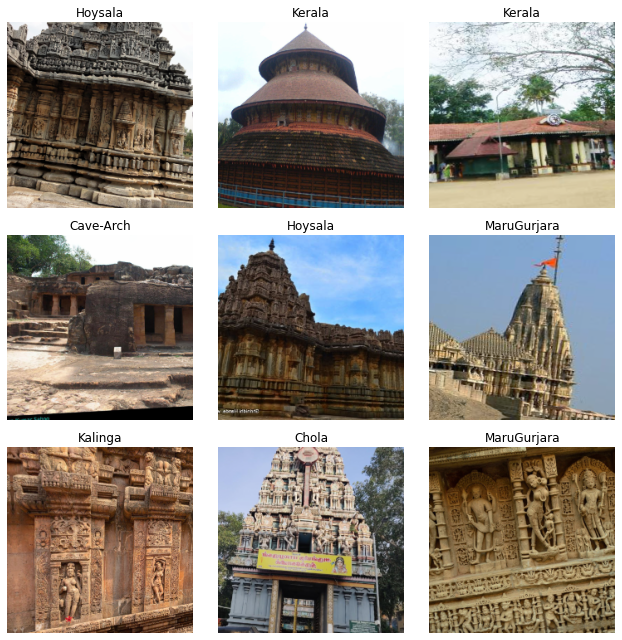

In [ ]:
data.show_batch(rows=3, figsize=(9, 9))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cave-Arch',
  'Chola',
  'Hoysala',
  'Kalinga',
  'Kerala',
  'MaruGurjara',
  'Mughal',
  'Rajput',
  'Tibetan'],
 9,
 1432,
 358)

In [ ]:
def _plot(i,j,ax):
    x,y = data.train_ds[15]
    x.show(ax, y=y)

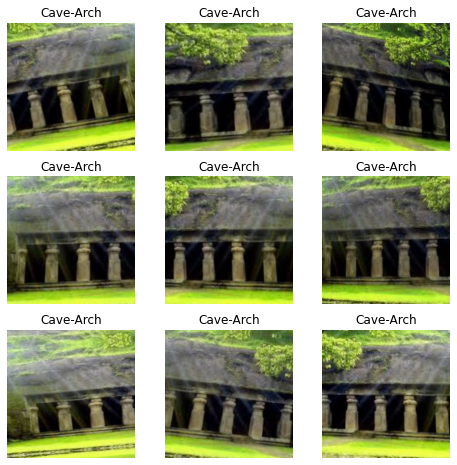

In [ ]:
plot_multi(_plot, 3, 3, figsize=(8,8))

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate, Precision(), Recall()], callback_fns=[CSVLogger])
# We will train for 6 epochs (6 cycles through all our data)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.model[1][3].p = 0.1
learn.model[1][7].p = 0.1
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,time
0,1.858849,0.903503,0.703911,0.296089,0.717092,0.712285,02:01
1,1.125206,0.677905,0.784916,0.215084,0.787482,0.785057,00:49
2,0.778984,0.538909,0.812849,0.187151,0.816434,0.811759,00:48
3,0.565801,0.494011,0.824022,0.175978,0.824123,0.826349,00:48
4,0.422653,0.486969,0.835196,0.164804,0.836820,0.834390,00:48
5,0.327097,0.488910,0.837989,0.162011,0.838241,0.836381,00:49


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.save('stage-1-resnet34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[('Tibetan', 'Kerala', 6),
 ('Mughal', 'Rajput', 5),
 ('Rajput', 'Mughal', 4),
 ('Kalinga', 'Chola', 3),
 ('MaruGurjara', 'Kalinga', 3)]

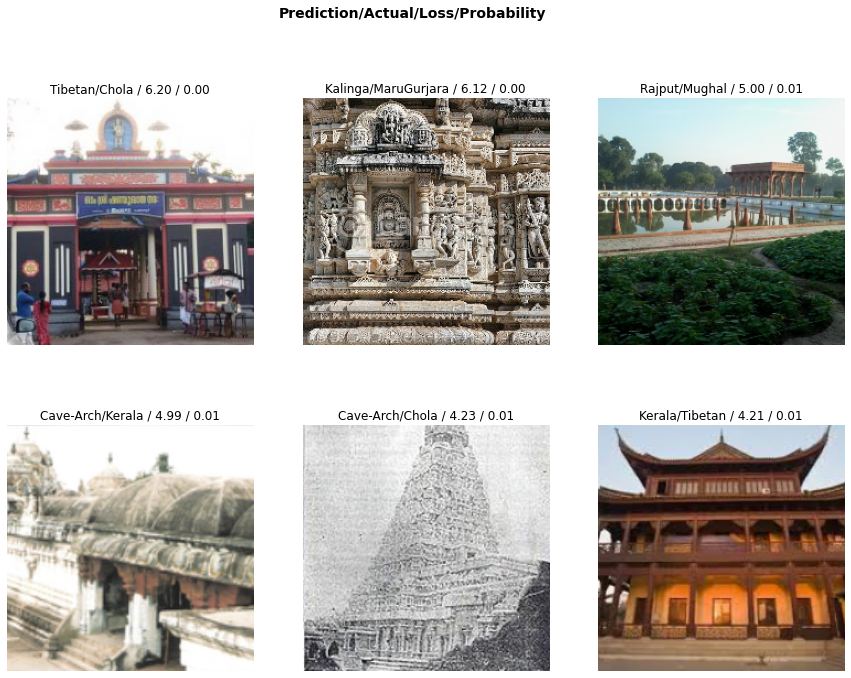

In [ ]:
interp.plot_top_losses(6, figsize=(15,11))

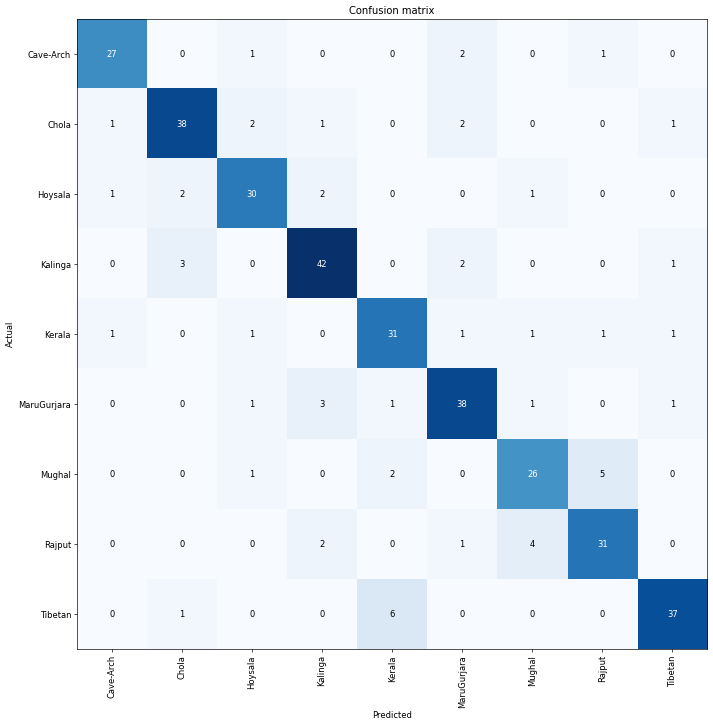

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


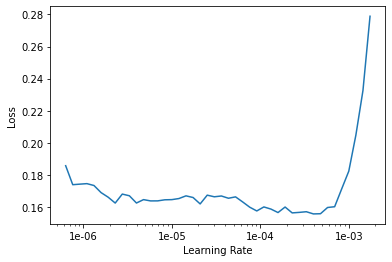

In [20]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,time
0,0.184099,0.602202,0.824022,0.175978,0.830515,0.825181,00:50
1,0.249174,0.715590,0.840782,0.159218,0.848653,0.835204,00:49
2,0.290820,0.798356,0.829609,0.170391,0.841944,0.827702,00:50
3,0.244728,0.465385,0.891061,0.108939,0.890109,0.889746,00:49
4,0.174128,0.413650,0.913408,0.086592,0.911665,0.911439,00:50
5,0.120942,0.385172,0.913408,0.086592,0.911673,0.912555,00:50


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.save('stage-2-resnet34')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[('Rajput', 'Mughal', 3)]

In [ ]:
interp.plot_top_losses(6, figsize=(15,11))

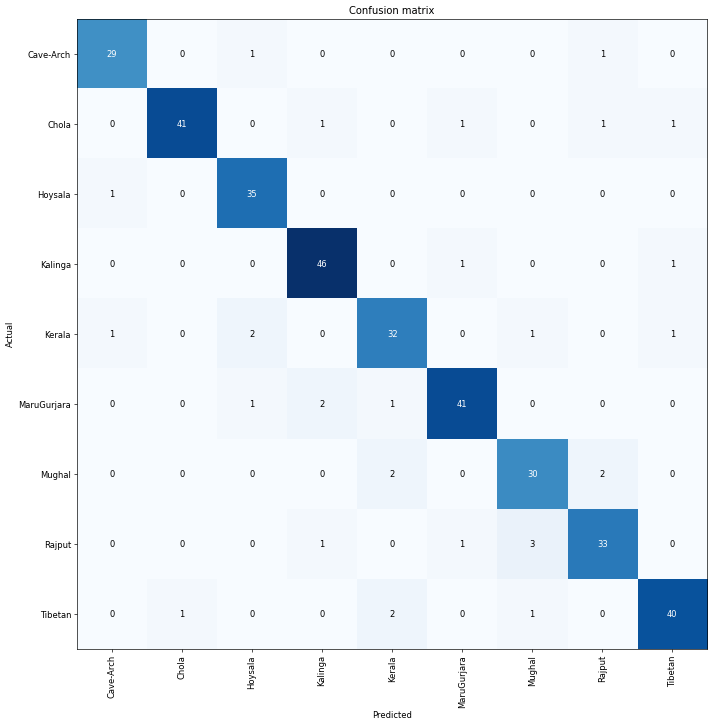

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)